<h1> UK ROAD ACCIDENT ANALYSIS </h1>
<h3> Analyst: Nichole Allyson D. Calderon </h3>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
uk_road_accident = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
uk_road_accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
uk_road_accident['Accident Date'] = pd.to_datetime(uk_road_accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [5]:
uk_road_accident['Year'] = uk_road_accident['Accident Date'].dt.year
uk_road_accident['Month'] = uk_road_accident['Accident Date'].dt.month
uk_road_accident['Day'] = uk_road_accident['Accident Date'].dt.day
uk_road_accident['DayOfWeek'] = uk_road_accident['Accident Date'].dt.dayofweek # Monday = 0. Sunday = 5

In [6]:
uk_road_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

<h1> 1. Which vehicle types are most often involved in accidents? </h1>

In [7]:
vehicle_type_df = uk_road_accident['Vehicle_Type']

In [8]:
vehicle_type_df

0                                          Car
1                                          Car
2                        Taxi/Private hire car
3         Bus or coach (17 or more pass seats)
4                                Other vehicle
                          ...                 
660674                                     Car
660675                                     Car
660676                                     Car
660677                   Motorcycle over 500cc
660678                                     Car
Name: Vehicle_Type, Length: 660679, dtype: object

In [9]:
vehicle_type_df.value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<H3> INSIGHT #1 - Most accidents involve cars, followed by vans, buses, and motorcycles over 500cc. </H3>

<h1> 2. Is there a correlation between number of vehicles and number of casualties in an accident? </h1>

In [10]:
no_of_vehicles = uk_road_accident['Number_of_Vehicles']

In [11]:
no_of_vehicles

0         2
1         2
2         3
3         4
4         2
         ..
660674    1
660675    1
660676    3
660677    2
660678    1
Name: Number_of_Vehicles, Length: 660679, dtype: int64

In [12]:
no_of_casualties = uk_road_accident['Number_of_Casualties']

In [13]:
no_of_casualties

0         1
1         1
2         1
3         1
4         1
         ..
660674    2
660675    1
660676    1
660677    1
660678    1
Name: Number_of_Casualties, Length: 660679, dtype: int64

In [14]:
uk_road_accident['Number_of_Vehicles'].corr(uk_road_accident['Number_of_Casualties'])

np.float64(0.22888886126927557)

<h3> INSIGHT #2 - As the number of vehicles involved in an accident increases, the number of casualties also tends to increase. </h3>

<H1> 3. What is the average number of vehicles involved in urban vs rural areas? </H1>

In [15]:
uk_road_accident.groupby('Urban_or_Rural_Area')['Number_of_Vehicles'].mean()

Urban_or_Rural_Area
Rural          1.866312
Unallocated    1.909091
Urban          1.811394
Name: Number_of_Vehicles, dtype: float64

<h3> INSIGHT #3 - Accidents in rural areas tend to involve slightly more vehicles on average than in urban areas.</h3>

<H1> 4. Which districts have the highest number of accidents? </H1>

In [16]:
uk_road_accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h3> INSIGHT #4 - Birmingham has the highest number of accidents (13,491), far ahead of other districts like Leeds (8,898) and Manchester (6,720). </h3>

<H1> 5. Does road surface condition show correlation with accident severity?</H1>

In [17]:
uk_road_accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size()

Road_Surface_Conditions  Accident_Severity
Dry                      Fatal                  5788
                         Serious               61638
                         Slight               380395
Flood over 3cm. deep     Fatal                    23
                         Serious                 152
                         Slight                  842
Frost or ice             Fatal                   193
                         Serious                2007
                         Slight                16317
Snow                     Fatal                    35
                         Serious                 565
                         Slight                 5290
Wet or damp              Fatal                  2620
                         Serious               23785
                         Slight               160303
dtype: int64

<h3> INSIGHT #5 - The majority of accidents happen on dry roads, with most being slight and fatal injuries.</h3>

<h1> 6. How does weather condition affect accident counts? </h1>

<Axes: xlabel='Weather_Conditions'>

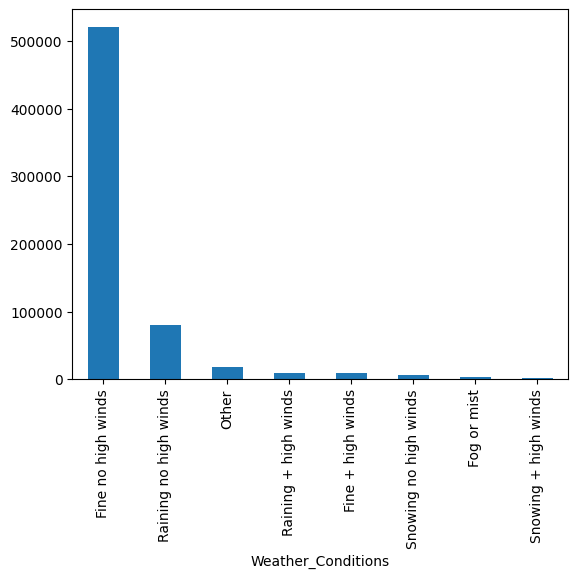

In [18]:
uk_road_accident['Weather_Conditions'].value_counts().plot(kind='bar')

<h3> INSIGHT #6 - Most accidents happen in fine no high winds. </h3>

<h1> 7. Does the mean number of casualties differ between daylight and darkness?</h1>

In [19]:
uk_road_accident.groupby('Light_Conditions')['Number_of_Casualties'].mean()

Light_Conditions
Darkness - lighting unknown    1.306447
Darkness - lights lit          1.369374
Darkness - lights unlit        1.331105
Darkness - no lighting         1.541657
Daylight                       1.340309
Name: Number_of_Casualties, dtype: float64

<h3> INSIGHT #7 - The mean number of casualties is slightly higher during darkness especially with no lighting compared to daylight. </h3>

<h1> 8. Are there specific districts with a higher proportion of severe accidents? </h1>

In [20]:
uk_road_accident.groupby(['District Area', 'Accident_Severity']).size()

District Area  Accident_Severity
Aberdeen City  Fatal                  12
               Serious               239
               Slight               1072
Aberdeenshire  Fatal                  66
               Serious               463
                                    ... 
Wyre Forest    Serious               132
               Slight                815
York           Fatal                  21
               Serious               255
               Slight               1621
Length: 1266, dtype: int64

<h3> INSIGHT #8 - Most districts report far more slight accidents than serious or fatal ones, but some areas (like Aberdeenshire with 66 fatal cases) stand out with a relatively higher proportion of severe accidents. </h3>

<H1> 9. Are certain road types more prone to severe accidents?</H1>

In [21]:
 uk_road_accident.groupby(['Road_Type', 'Accident_Severity']).size()

Road_Type           Accident_Severity
Dual carriageway    Fatal                  1815
                    Serious               11746
                    Slight                85863
One way street      Fatal                    95
                    Serious                1655
                    Slight                11809
Roundabout          Fatal                   142
                    Serious                3665
                    Slight                40185
Single carriageway  Fatal                  6527
                    Serious               70059
                    Slight               415557
Slip road           Fatal                    49
                    Serious                 611
                    Slight                 6381
dtype: int64

<h3> INSIGHT #9 - Single carriageways are the most accident-prone and carry the highest fatality risk.</h3>

<H1> 10. How does accident severity differ between daylight and darkness? </H1>

In [22]:
uk_road_accident.groupby(['Light_Conditions', 'Accident_Severity']).size()

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Fatal                    68
                             Serious                 794
                             Slight                 5622
Darkness - lights lit        Fatal                  1860
                             Serious               19130
                             Slight               108345
Darkness - lights unlit      Fatal                    45
                             Serious                 360
                             Slight                 2138
Darkness - no lighting       Fatal                  1612
                             Serious                7174
                             Slight                28651
Daylight                     Fatal                  5076
                             Serious               60759
                             Slight               419045
dtype: int64

<Axes: xlabel='Light_Conditions,Accident_Severity'>

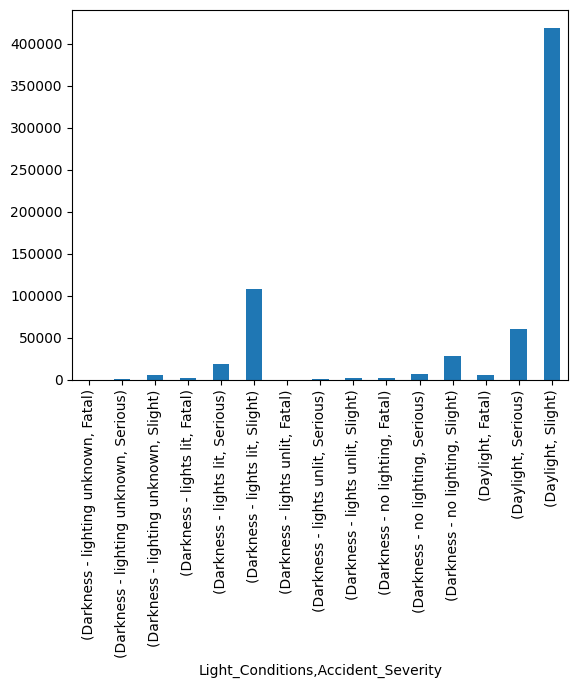

In [23]:
uk_road_accident.groupby(['Light_Conditions', 'Accident_Severity']).size().plot(kind='bar')

<h3> INSIGHT #10 - Most accidents happen during daylight, but the majority are slight injuries.</h3>

<h1> 11.  What are the most common road surface conditions during accidents?</h1>

In [24]:
 uk_road_accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h3> INSIGHT #11 - Most accidents occur on dry roads. </h3>

<H1> 12. Does the number of vehicles involved in an accident correlate with the number of casualties? </H1>

In [25]:
uk_road_accident['Number_of_Vehicles'].corr(uk_road_accident['Number_of_Casualties'])

np.float64(0.22888886126927557)

<h3> INSIGHT #12 - Multi-vehicle crashes often lead to more casualties, but many severe accidents also happen with just one vehicle.</h3>

<H1> 13. Do fatal accidents have a higher average number of casualties than serious or slight accidents?</H1>

In [26]:
 uk_road_accident.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h3> INSIGHT #13 - Fatal accidents involve more casualties on average than serious or slight accidents.</h3>

<H1> 14. Is there a correlation between latitude/longitude and the number of casualties? </H1>

In [27]:
uk_road_accident[['Latitude', 'Longitude', 'Number_of_Casualties']].corr()

,Latitude,Longitude,Number_of_Casualties
Latitude,1.000000,-0.398114,0.032201
Longitude,-0.398114,1.000000,-0.040406
Number_of_Casualties,0.032201,-0.040406,1.000000


<h3> INSIGHT #14 - Accident severity (in terms of casualties) is driven more by road type, conditions, and vehicles rather than geographic coordinates.</h3>

<H1> 15. Do weather conditions affect accident counts?</H1>

In [28]:
uk_road_accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<Axes: xlabel='Weather_Conditions'>

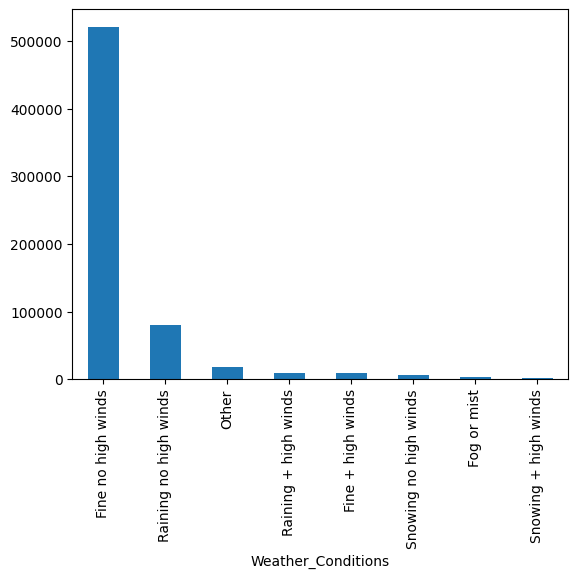

In [29]:
uk_road_accident['Weather_Conditions'].value_counts().plot(kind='bar')

<h3> INSIGHT #15 - Accident counts are highest in normal clear weather, but opposing conditions like rain increase the risk per trip.</h3>

<h1> 16. What is the average number of casualties per vehicle type involved? </h1>

In [30]:
uk_road_accident.groupby('Vehicle_Type')['Number_of_Casualties'].mean()

Vehicle_Type
Agricultural vehicle                     1.342065
Bus or coach (17 or more pass seats)     1.349216
Car                                      1.358841
Data missing or out of range             1.500000
Goods 7.5 tonnes mgw and over            1.351881
Goods over 3.5t. and under 7.5t          1.362861
Minibus (8 - 16 passenger seats)         1.345648
Motorcycle 125cc and under               1.332635
Motorcycle 50cc and under                1.337235
Motorcycle over 125cc and up to 500cc    1.343521
Motorcycle over 500cc                    1.359434
Other vehicle                            1.340075
Pedal cycle                              1.370558
Ridden horse                             1.250000
Taxi/Private hire car                    1.368663
Van / Goods 3.5 tonnes mgw or under      1.354537
Name: Number_of_Casualties, dtype: float64

<h3> INSIGHT #16 - Pedal cycles and taxis/private cars show the highest casualty averages, while ridden horses the lowest. </h3>

<H1> 17. Which road types in rural vs urban areas see more fatal accidents? </H1>

In [31]:
fatal = uk_road_accident[uk_road_accident['Accident_Severity'] == 'Fatal']

In [32]:
fatal

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3,3
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,11,2,5
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,24,3
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,11,24,6
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,2022-01-29,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,2022,1,29,5
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022,2,2,2
660565,201091NJ11329,Fatal,2022-08-15,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over,2022,8,15,0
660581,201091NJ14695,Fatal,2022-10-21,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,10,21,4


In [33]:
fatal.groupby(['Urban_or_Rural_Area', 'Road_Type']).size()

Urban_or_Rural_Area  Road_Type         
Rural                Dual carriageway      1201
                     One way street           8
                     Roundabout              62
                     Single carriageway    4276
                     Slip road               36
Urban                Dual carriageway       614
                     One way street          87
                     Roundabout              80
                     Single carriageway    2251
                     Slip road               13
dtype: int64

<Axes: xlabel='Urban_or_Rural_Area,Road_Type'>

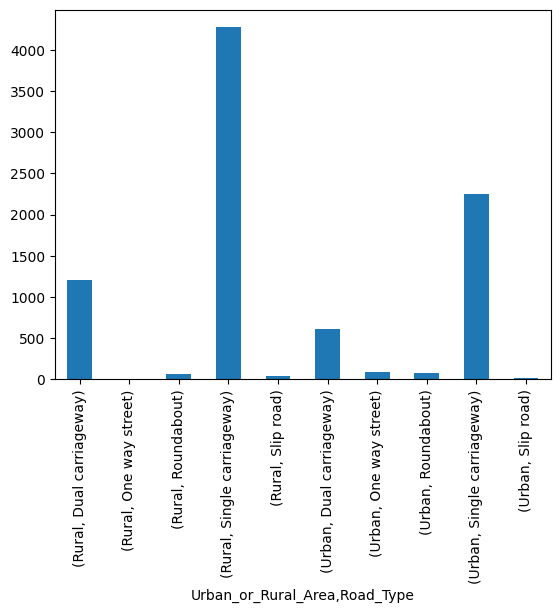

In [34]:
fatal.groupby(['Urban_or_Rural_Area', 'Road_Type']).size().plot(kind='bar')

<h3> INSIGHT #17 - Rural single carriageways record the highest number of fatal accidents, far above other road types. </h3>

<H1> 18. What is the average number of casualties per accident? </H1>

In [35]:
uk_road_accident['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<H3> INSIGHT #18 - The average number of casualties per accident is 1.36. </H3>

<H1> 19. What is the most common accident severity? </H1>

In [36]:
uk_road_accident['Accident_Severity'].mode()[0]

'Slight'

<H3> INSIGHT #19 - The most common accident severity is “Slight”. </H3>

<H1> 20. What is the most common weather condition during accidents? </H1>

In [37]:
uk_road_accident['Weather_Conditions'].mode()[0]

'Fine no high winds'

<H3> INSIGHT #20 - Most common weather condition during accidents is "Fine no high winds".  </H3>

<h1> 21. Which year has the most fatal accident severity?</h1>

In [38]:
uk_road_accident[uk_road_accident['Accident_Severity'] == 'Fatal']['Year'].value_counts()

Year
2019    2714
2020    2341
2021    2057
2022    1549
Name: count, dtype: int64

<h3> INSIGHT #21 - Fatal accidents were most frequent in 2019, with 1,116 occurrences. </h3>

<h1> 22. Are fatal bus accidents more frequent in certain months compared to cars? </h1>

In [39]:
 uk_road_accident['Accident Date'].dt.month_name()

0              June
1              July
2            August
3            August
4         September
            ...    
660674     February
660675     February
660676     February
660677     February
660678     February
Name: Accident Date, Length: 660679, dtype: object

In [40]:
 fatal_bus_car = uk_road_accident[(uk_road_accident['Accident_Severity'] == 'Fatal') & ((uk_road_accident['Vehicle_Type'] == 'Car') | (uk_road_accident['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)'))]

In [41]:
fatal_bus_car

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3,3
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,11,2,5
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,24,3
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,11,24,6
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660393,201091NE00716,Fatal,2022-01-17,57.533183,Darkness - no lighting,Highland,-4.270034,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,1,17,0
660464,201091NH00032,Fatal,2022-01-02,58.206541,Darkness - no lighting,Western Isles,-6.419208,3,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,1,2,6
660470,201091NH00529,Fatal,2022-01-29,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,2022,1,29,5
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022,2,2,2


In [42]:
fatal_bus_car.groupby(['Vehicle_Type', 'Month']).size().unstack(fill_value=0)


Month,1,2,3,4,5,6,7,8,9,10,11,12
Vehicle_Type,,,,,,,,,,,,
Bus or coach (17 or more pass seats),23,25,26,21,33,26,34,20,30,30,29,28
Car,551,470,515,543,579,514,567,620,555,611,546,506


<h3> INSIGHT #22 - Cars dominate fatal accidents across all months, with counts in the hundreds each month, while buses only record single- to low-double-digit fatal accidents. </h3>

<h1> 23. Which day of the week records the most serious accidents? </h1>

In [43]:
uk_road_accident[uk_road_accident['Accident_Severity'] == 'Serious']['DayOfWeek'].value_counts()

DayOfWeek
5    14000
6    13074
4    12633
2    12488
3    12440
1    11918
0    11664
Name: count, dtype: int64

<H3> INSIGHT #23 - The highest number of serious accidents occurred on Sunday with 5,596 cases.</H3>

<H1> 24. Are December accidents more likely to occur in darkness compared to June accidents? </H1>

In [44]:
December = uk_road_accident[uk_road_accident['Month'] == 12]
June = uk_road_accident[uk_road_accident['Month'] == 6]

In [45]:
December

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
621,200701BS70663,Slight,2019-12-01,51.498826,Darkness - lights lit,Kensington and Chelsea,-0.192370,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,12,1,6
623,200701BS70666,Slight,2019-12-04,51.491661,Daylight,Kensington and Chelsea,-0.159520,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,12,4,2
624,200701BS70667,Slight,2019-12-06,51.495745,Darkness - lights lit,Kensington and Chelsea,-0.196669,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Taxi/Private hire car,2019,12,6,4
626,200701BS70670,Slight,2019-12-03,51.491964,Daylight,Kensington and Chelsea,-0.161669,1,2,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,12,3,1
630,200701BS70674,Slight,2019-12-05,51.497015,Darkness - lights lit,Kensington and Chelsea,-0.168381,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,12,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660652,201091NL06975,Slight,2022-12-14,60.278072,Darkness - no lighting,Shetland Islands,-1.244924,1,1,Frost or ice,Single carriageway,Rural,Other,Motorcycle over 500cc,2022,12,14,2
660653,201091NL07035,Slight,2022-12-16,60.305886,Darkness - no lighting,Shetland Islands,-1.241025,8,2,Wet or damp,Single carriageway,Rural,Snowing + high winds,Car,2022,12,16,4
660654,201091NL07083,Slight,2022-12-19,60.070562,Daylight,Shetland Islands,-1.229727,7,2,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022,12,19,0
660655,201091NL07153,Slight,2022-12-23,60.239368,Daylight,Shetland Islands,-1.228658,1,2,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022,12,23,4


In [46]:
June

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
263,200701BS70271,Slight,2019-06-03,51.497381,Daylight,Kensington and Chelsea,-0.203664,2,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2019,6,3,0
265,200701BS70273,Slight,2019-06-05,51.490065,Daylight,Kensington and Chelsea,-0.195741,1,2,Dry,One way street,Urban,Fine no high winds,Car,2019,6,5,2
266,200701BS70274,Slight,2019-06-06,51.499516,Daylight,Kensington and Chelsea,-0.208047,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,6,3
267,200701BS70275,Slight,2019-06-05,51.515917,Daylight,Kensington and Chelsea,-0.216195,1,1,Dry,Dual carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660611,201091NK03191,Slight,2022-06-27,59.003939,Darkness - lights lit,Orkney Islands,-3.110249,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,6,27,0
660612,201091NK03220,Slight,2022-06-29,59.130424,Darkness - no lighting,Orkney Islands,-3.019111,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,6,29,2
660633,201091NL03115,Slight,2022-06-06,60.453875,Daylight,Shetland Islands,-1.212488,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,6,6,0
660634,201091NL03498,Slight,2022-06-25,60.163527,Daylight,Shetland Islands,-1.160345,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,6,25,5


In [47]:
december_dark = December['Light_Conditions'].value_counts()
june_dark = June['Light_Conditions'].value_counts()

In [48]:
december_dark

Light_Conditions
Daylight                       26255
Darkness - lights lit          18777
Darkness - no lighting          5574
Darkness - lighting unknown      928
Darkness - lights unlit          302
Name: count, dtype: int64

In [49]:
june_dark

Light_Conditions
Daylight                       50249
Darkness - lights lit           4473
Darkness - no lighting          1343
Darkness - lighting unknown      283
Darkness - lights unlit          133
Name: count, dtype: int64

<H3> INSIGHT #24 = In December, darkness-related accidents are much higher (11,487 cases) compared to June (2,386 cases).</H3>

<h1> 25. </h1>

In [50]:
uk_road_accident['Month'] = uk_road_accident['Accident Date'].dt.month

In [51]:
uk_road_accident['Month']

0         6
1         7
2         8
3         8
4         9
         ..
660674    2
660675    2
660676    2
660677    2
660678    2
Name: Month, Length: 660679, dtype: int32

In [52]:
roundabout = uk_road_accident[uk_road_accident['Road_Type'] == 'Roundabout']

In [53]:
roundabout

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
111,200701BS70099,Slight,2019-03-02,51.509605,Daylight,Kensington and Chelsea,-0.197419,1,2,Dry,Roundabout,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,3,2,5
134,200701BS70130,Slight,2019-03-11,51.504582,Daylight,Hammersmith and Fulham,-0.215917,1,2,Dry,Roundabout,Urban,Fine no high winds,Goods over 3.5t. and under 7.5t,2019,3,11,0
136,200701BS70132,Slight,2019-03-16,51.494508,Daylight,Kensington and Chelsea,-0.174821,1,1,Dry,Roundabout,Urban,Fine no high winds,Car,2019,3,16,5
187,200701BS70191,Slight,2019-04-16,51.515893,Daylight,Hammersmith and Fulham,-0.220520,1,2,Dry,Roundabout,Urban,Fine no high winds,Motorcycle 125cc and under,2019,4,16,1
226,200701BS70232,Slight,2019-05-12,51.525887,Daylight,Kensington and Chelsea,-0.215373,2,2,Dry,Roundabout,Urban,Fine no high winds,Taxi/Private hire car,2019,5,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660277,201063DP31910,Slight,2022-10-10,51.944974,Daylight,Powys,-3.410194,1,2,Dry,Roundabout,Rural,Fine no high winds,Car,2022,10,10,0
660283,201063DP32610,Slight,2022-10-09,51.790957,Daylight,Powys,-3.738311,2,3,Dry,Roundabout,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022,10,9,6
660452,201091NE15605,Slight,2022-10-27,57.627994,Daylight,Highland,-4.367237,1,2,Wet or damp,Roundabout,Rural,Other,Car,2022,10,27,3
660479,201091NH02588,Slight,2022-05-21,58.219552,Daylight,Western Isles,-6.386228,1,2,Dry,Roundabout,Rural,Fine no high winds,Car,2022,5,21,5


In [54]:
roundabout_month = roundabout.groupby('Month').size()

In [55]:
roundabout_month 

Month
1     3381
2     3246
3     3620
4     3461
5     3653
6     3791
7     3835
8     3749
9     3865
10    4066
11    4105
12    3220
dtype: int64

<h3> INSIGHT #25 - Roundabout accidents occur throughout the year, but they are most frequent in November (1,658).</h3>

<h1> DATA VISUALIZATION </h1>

In [56]:
uk_road_accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [57]:
uk_road_accident['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [61]:
Chester_df = uk_road_accident[uk_road_accident['District Area'] == 'Chester']

In [62]:
Chester_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
41726,2.01E+12,Slight,2019-12-31,53.271843,Darkness - lights lit,Chester,-2.821253,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,12,31,1
41734,2.01E+12,Slight,2019-11-26,53.187387,Daylight,Chester,-2.853462,1,2,NaN,Roundabout,Urban,Other,Car,2019,11,26,1
41773,2.01E+12,Slight,2019-06-25,53.164898,Daylight,Chester,-2.904323,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2019,6,25,1
41774,2.01E+12,Slight,2019-06-25,53.168427,Daylight,Chester,-2.901255,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2019,6,25,1
41778,2.01E+12,Slight,2019-06-26,53.266217,Daylight,Chester,-2.802554,1,3,Dry,Slip road,Rural,Fine no high winds,Motorcycle over 500cc,2019,6,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392609,2.01E+12,Slight,2021-03-30,53.194530,Daylight,Chester,-2.847616,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2021,3,30,1
392616,2.01E+12,Slight,2021-03-30,53.262564,Darkness - lights lit,Chester,-2.910580,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,3,30,1
392626,2.01E+12,Slight,2021-03-31,53.188010,Daylight,Chester,-2.854372,3,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2021,3,31,2
392633,2.01E+12,Slight,2021-03-31,52.985995,Darkness - no lighting,Chester,-2.721826,1,2,Dry,Single carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2021,3,31,2


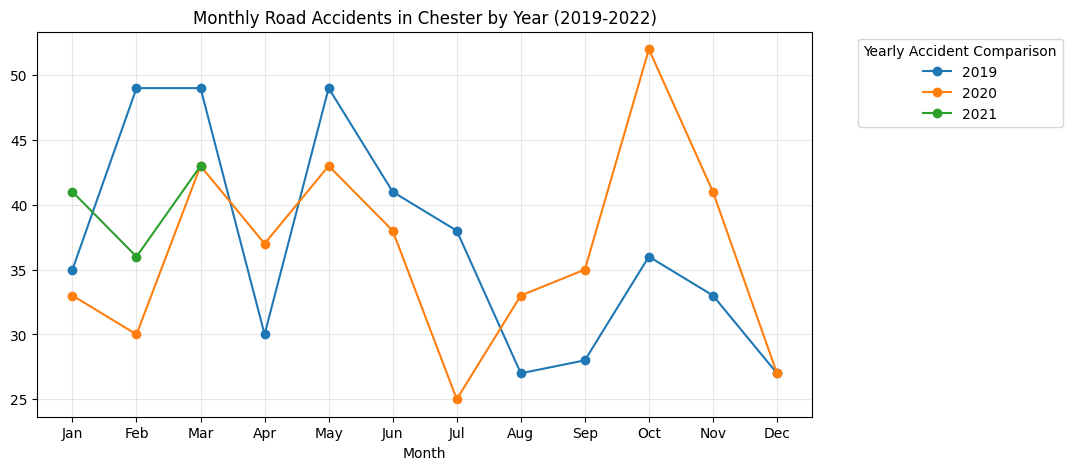

In [63]:
monthly_chesterdata = Chester_df.groupby(['Year', 'Month']).size()

monthly_chesterdata = monthly_chesterdata.unstack(level=0)

monthly_chesterdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Chester by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

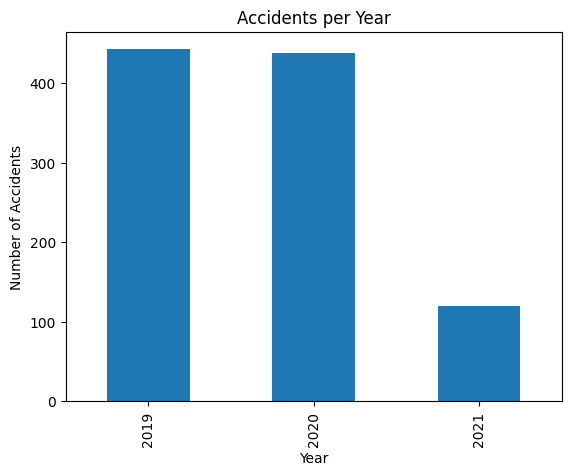

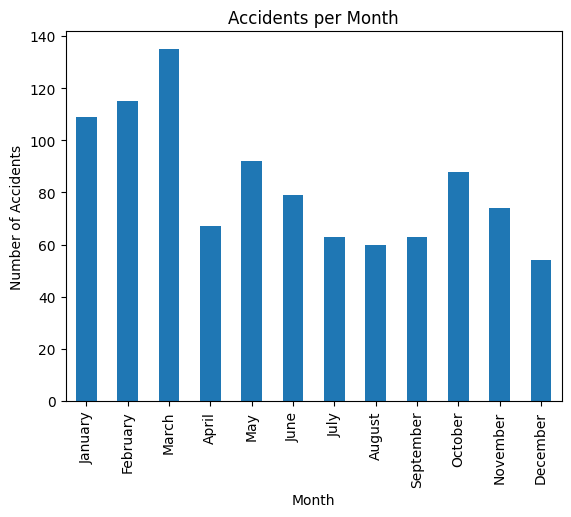

DayOfWeek
Monday       109
Tuesday      129
Wednesday    133
Thursday     165
Friday       157
Saturday     166
Sunday       140
Name: count, dtype: int64


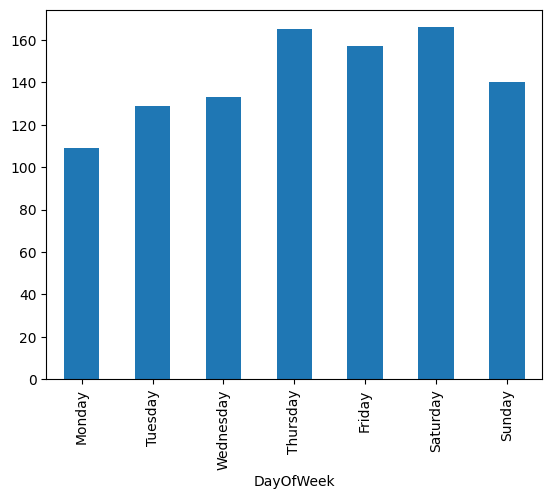

In [64]:
# Accidents per year
accidents_per_year = Chester_df['Year'].value_counts().sort_index()
accidents_per_month = Chester_df['Month'].value_counts().sort_index()
accidents_per_day = Chester_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> Accident Severity in Chester </h1>

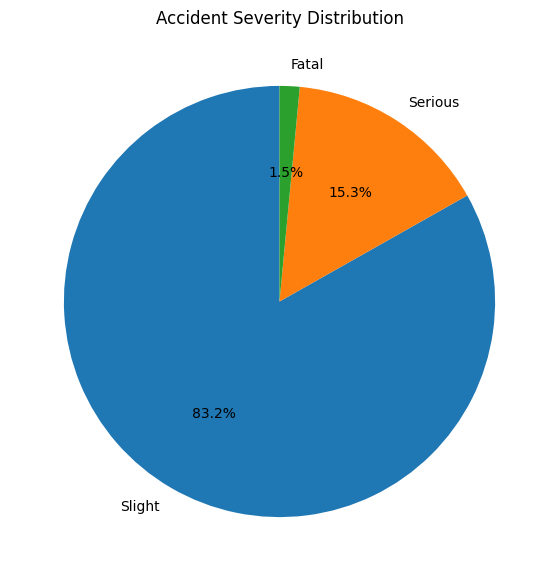

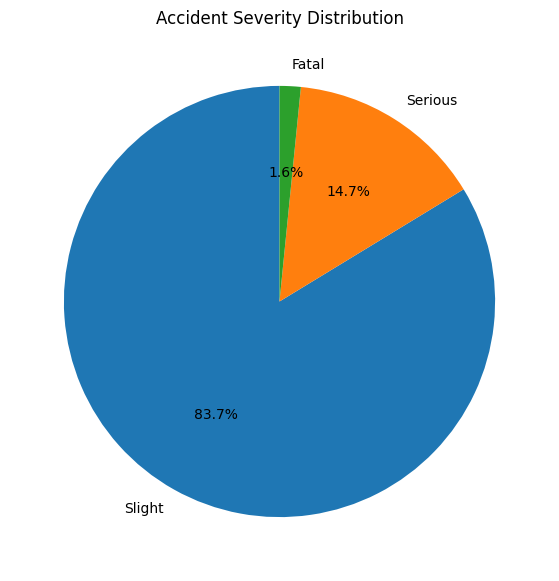

In [65]:
severity_chester  = Chester_df['Accident_Severity'].value_counts()

plt.pie(severity_chester,
        labels = severity_chester.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_chester = Chester_df[Chester_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_chester['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [66]:
powys_df = uk_road_accident[uk_road_accident['District Area'] == 'Powys']

In [67]:
powys_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
169264,200763DP00107,Slight,2019-01-06,52.661134,Daylight,Powys,-3.306565,1,3,Dry,Single carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2019,1,6,6
169265,200763DP00207,Slight,2019-01-05,52.322267,Daylight,Powys,-3.114176,1,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2019,1,5,5
169266,200763DP00307,Slight,2019-01-04,52.600307,Daylight,Powys,-3.855828,3,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,1,4,4
169267,200763DP00407,Slight,2019-01-05,52.151249,Darkness - no lighting,Powys,-3.378846,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,1,5,5
169268,200763DP00507,Slight,2019-01-22,52.659526,Daylight,Powys,-3.361520,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2019,1,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660382,201063DP42910,Slight,2022-12-21,52.514222,Daylight,Powys,-3.315171,1,1,Snow,One way street,Urban,Snowing no high winds,Car,2022,12,21,2
660383,201063DP43110,Slight,2022-10-16,52.520103,Daylight,Powys,-3.303703,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,10,16,6
660384,201063DP43210,Slight,2022-11-08,51.861265,Daylight,Powys,-3.135571,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,11,8,1
660385,201063DP43310,Slight,2022-12-27,52.285350,Darkness - no lighting,Powys,-3.507771,1,1,Frost or ice,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under,2022,12,27,1


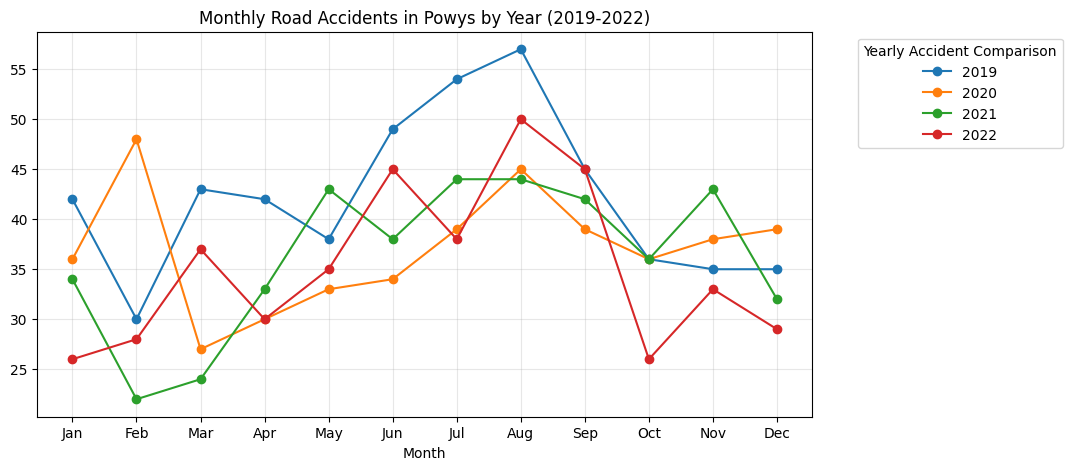

In [68]:
monthly_powysdata = powys_df.groupby(['Year', 'Month']).size()

monthly_powysdata = monthly_powysdata.unstack(level=0)

monthly_powysdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Powys by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

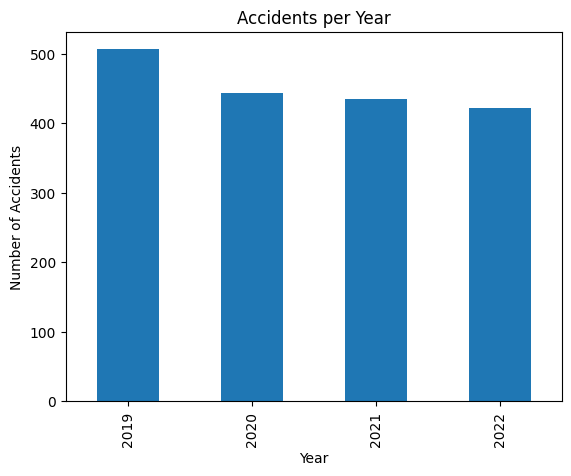

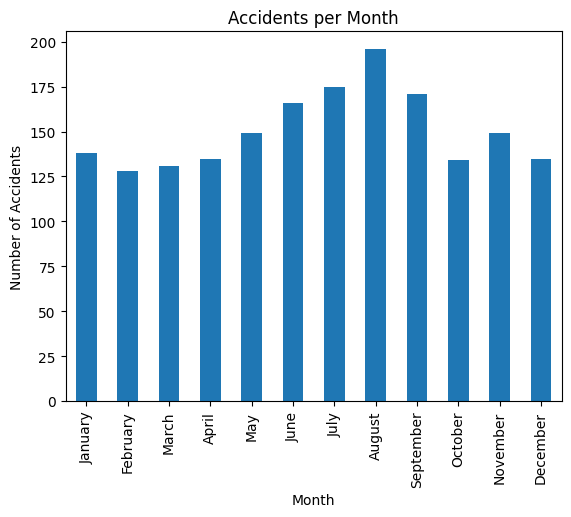

DayOfWeek
Monday       284
Tuesday      229
Wednesday    235
Thursday     239
Friday       234
Saturday     307
Sunday       279
Name: count, dtype: int64


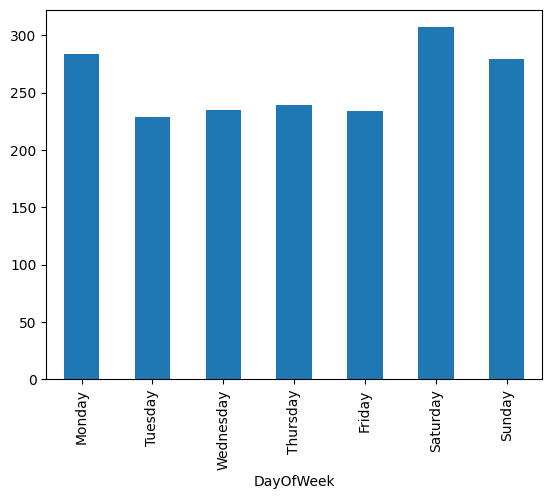

In [69]:
# Accidents per year
accidents_per_year = powys_df['Year'].value_counts().sort_index()
accidents_per_month = powys_df['Month'].value_counts().sort_index()
accidents_per_day = powys_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> Accident Severity in Powys </h1>

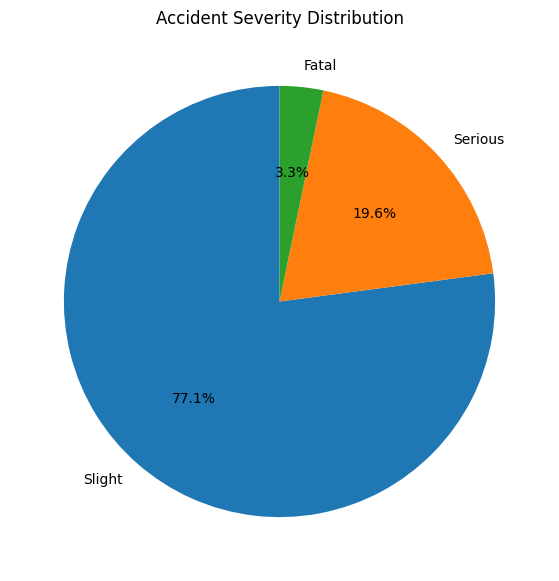

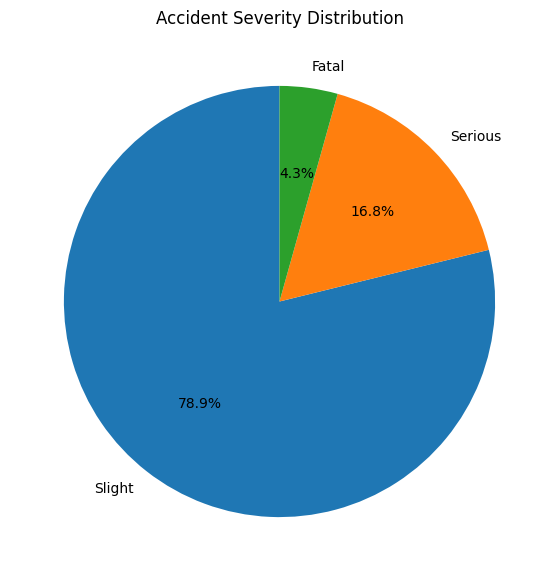

In [70]:
severity_powys  = powys_df['Accident_Severity'].value_counts()

plt.pie(severity_powys,
        labels = severity_powys.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_powys = powys_df[powys_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_powys['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


In [71]:
woking_df = uk_road_accident[uk_road_accident['District Area'] == 'Woking']

In [72]:
woking_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
130764,200745EL98619,Slight,2019-01-17,51.344977,Darkness - lights lit,Woking,-0.485182,1,1,Wet or damp,Dual carriageway,Rural,Raining + high winds,Bus or coach (17 or more pass seats),2019,1,17,3
132454,200745RU00627,Slight,2019-03-10,51.307351,Darkness - lights lit,Woking,-0.553422,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,3,10,6
132466,200745RU01330,Slight,2019-03-23,51.316923,Daylight,Woking,-0.578664,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2019,3,23,5
132559,200745RU06348,Slight,2019-06-26,51.338876,Daylight,Woking,-0.493279,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,26,2
132592,200745RU08145,Slight,2019-07-24,51.334287,Daylight,Woking,-0.542813,2,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,7,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632184,201045WO57058,Slight,2022-12-28,51.327805,Daylight,Woking,-0.549477,1,3,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,12,28,2
632185,201045WO57075,Slight,2022-12-20,51.331386,Darkness - lighting unknown,Woking,-0.577499,1,1,Dry,Single carriageway,Rural,NaN,Motorcycle 50cc and under,2022,12,20,1
632186,201045WO57096,Slight,2022-12-24,51.320451,Darkness - lights lit,Woking,-0.610415,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,12,24,5
632187,201045WO57114,Slight,2022-12-19,51.344080,Darkness - lighting unknown,Woking,-0.542072,1,1,Snow,Single carriageway,Rural,Other,Car,2022,12,19,0


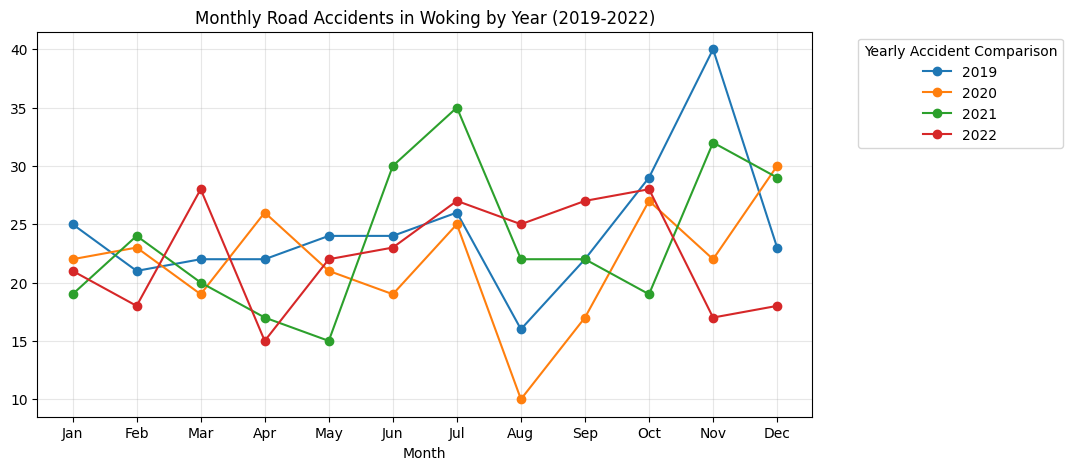

In [73]:
monthly_wokingdata = woking_df.groupby(['Year', 'Month']).size()

monthly_wokingdata = monthly_wokingdata.unstack(level=0)

monthly_wokingdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Woking by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

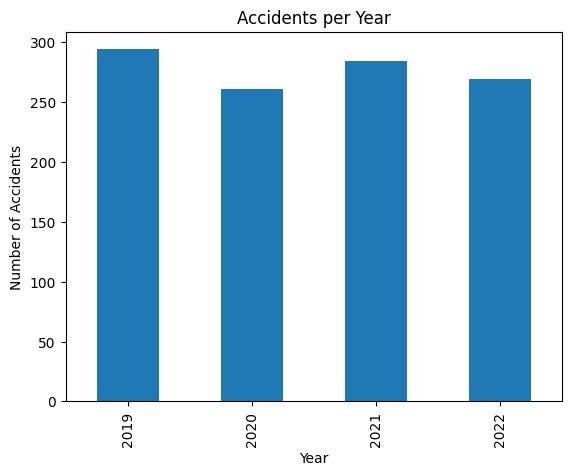

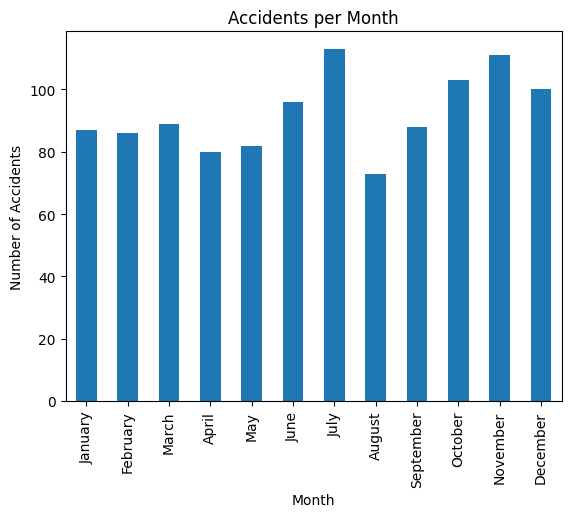

DayOfWeek
Monday        97
Tuesday      168
Wednesday    173
Thursday     188
Friday       178
Saturday     162
Sunday       142
Name: count, dtype: int64


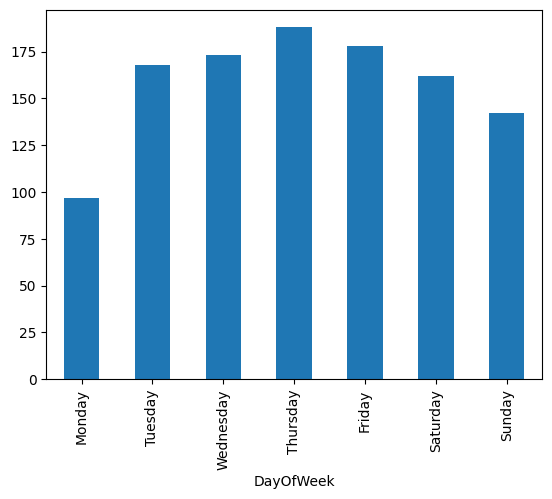

In [74]:
# Accidents per year
accidents_per_year = woking_df['Year'].value_counts().sort_index()
accidents_per_month = woking_df['Month'].value_counts().sort_index()
accidents_per_day = woking_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> Accident Severity in Woking </h1>

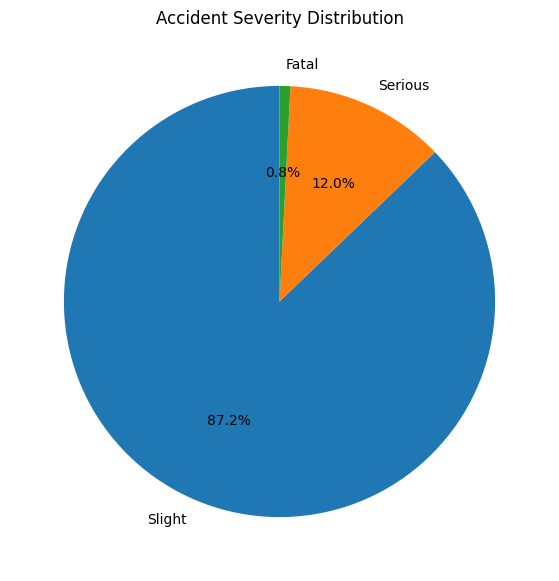

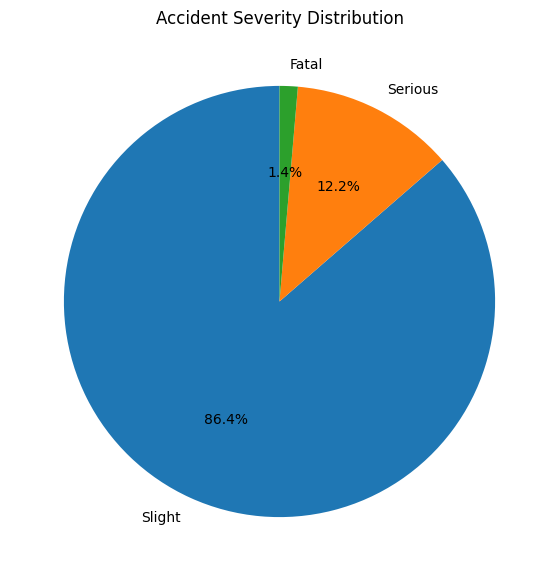

In [75]:
severity_woking  = woking_df['Accident_Severity'].value_counts()

plt.pie(severity_woking,
        labels = severity_woking.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_woking = woking_df[woking_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_woking['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [76]:
wirral_df = uk_road_accident[uk_road_accident['District Area'] == 'Wirral']

In [77]:
wirral_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
30256,200705AA14117,Slight,2019-01-04,53.356109,Darkness - lights unlit,Wirral,-2.993558,1,1,Wet or damp,Single carriageway,Urban,Raining + high winds,Car,2019,1,4,4
30257,200705AA14120,Slight,2019-01-04,53.424085,Daylight,Wirral,-3.054436,1,2,Dry,Single carriageway,Urban,NaN,Goods 7.5 tonnes mgw and over,2019,1,4,4
30258,200705AA14126,Slight,2019-01-05,53.419533,Daylight,Wirral,-3.050712,1,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2019,1,5,5
30259,200705AA14156,Serious,2019-01-05,53.352817,Darkness - lights lit,Wirral,-3.082725,3,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2019,1,5,5
30260,200705AA14167,Slight,2019-01-06,53.374125,Daylight,Wirral,-3.041928,2,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546737,201005AA07401,Slight,2022-12-25,53.398963,Daylight,Wirral,-3.089160,1,1,Frost or ice,Dual carriageway,Rural,Fine no high winds,Car,2022,12,25,6
546738,201005AA07408,Slight,2022-12-24,53.385681,Daylight,Wirral,-3.086716,1,2,Frost or ice,Single carriageway,Rural,Fog or mist,Car,2022,12,24,5
546739,201005AA07441,Slight,2022-12-12,53.378281,Daylight,Wirral,-3.049697,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,12,12,0
546740,201005AA07485,Slight,2022-11-22,53.340412,Darkness - no lighting,Wirral,-3.021430,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2022,11,22,1


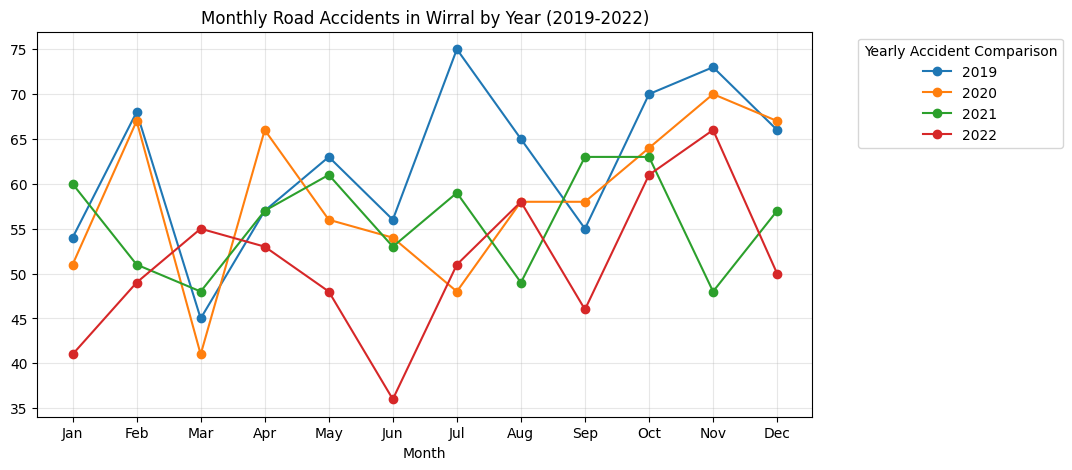

In [78]:
monthly_wirraldata = wirral_df.groupby(['Year', 'Month']).size()

monthly_wirraldata = monthly_wirraldata.unstack(level=0)

monthly_wirraldata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Wirral by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

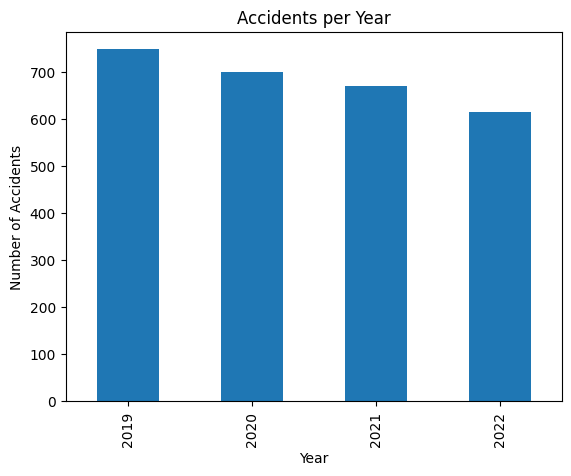

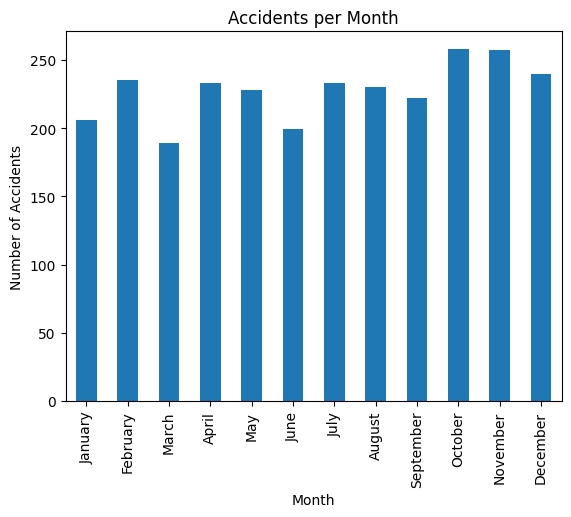

DayOfWeek
Monday       341
Tuesday      374
Wednesday    434
Thursday     388
Friday       393
Saturday     453
Sunday       347
Name: count, dtype: int64


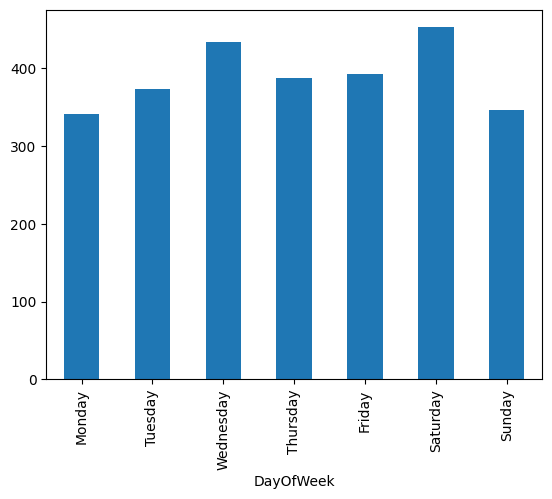

In [79]:
# Accidents per year
accidents_per_year = wirral_df['Year'].value_counts().sort_index()
accidents_per_month = wirral_df['Month'].value_counts().sort_index()
accidents_per_day = wirral_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)